# Polynomial Stock of Historical Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.polynomial.chebyshev import chebfit,chebval
import pandas as pd

import warnings
warnings.filterwarnings("ignore") 

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2017-01-03,11.43,11.43,11.65,11.02,11.42,55182000
2017-01-04,11.43,11.43,11.52,11.24,11.45,40781200
2017-01-05,11.24,11.24,11.69,11.23,11.43,38855200
2017-01-06,11.32,11.32,11.49,11.11,11.29,34453500
2017-01-09,11.49,11.49,11.64,11.31,11.37,37304800


In [3]:
dataset.tail()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-12-24,16.650000,16.650000,17.219999,16.370001,16.520000,62933100
2018-12-26,17.900000,17.900000,17.910000,16.030001,16.879999,108811800
2018-12-27,17.490000,17.490000,17.740000,16.440001,17.430000,111373000
2018-12-28,17.820000,17.820000,18.309999,17.139999,17.530001,109214400
2018-12-31,18.459999,18.459999,18.510000,17.850000,18.150000,84732200


In [4]:
y = np.array(dataset['Adj Close'])

In [5]:
len(y)

502

In [6]:
x = np.arange(len(y))
c = chebfit(x, y, 30)


In [7]:
p = []
for i in np.arange(len(y)):
    p.append(chebval(i, c))

In [8]:
df = pd.DataFrame(data={'x': x, 'y': y, 'p': p})
df['diff'] = df['y'] - df['p']

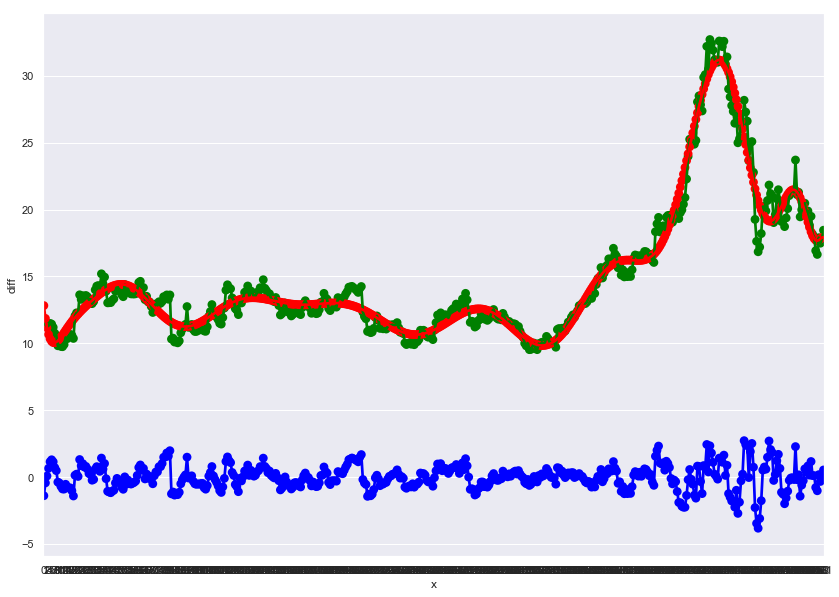

In [9]:
sns.set(rc={'figure.figsize':(14,10)})
sns.pointplot(x = 'x', y = 'y', data=df, color='green')
sns.pointplot(x = 'x', y = 'p', data=df, color='red')
sns.pointplot(x = 'x', y = 'diff', data=df, color='blue')